## Описание и задачи исследования <a id="#description"></a>

# Цель исследования

Выполнитель поставленные задачи и описать итоги.

# Описание данных

Таблица `books`

Содержит данные о книгах:
* `book_id` — идентификатор книги;
* `author_id` — идентификатор автора;
* `title` — название книги;
* `num_pages` — количество страниц;
* `publication_date` — дата публикации книги;
* `publisher_id` — идентификатор издателя.

Таблица `authors`

Содержит данные об авторах:
* `author_id` — идентификатор автора;
* `author` — имя автора.

Таблица `publishers`

Содержит данные об издательствах:
* `publisher_id` — идентификатор издательства;
* `publisher` — название издательства;

Таблица `ratings`

Содержит данные о пользовательских оценках книг:
* `rating_id` — идентификатор оценки;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, оставившего оценку;
* `rating` — оценка книги.

Таблица `reviews`

Содержит данные о пользовательских обзорах на книги:
* `review_id` — идентификатор обзора;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, написавшего обзор;
* `text` — текст обзора.

# Источник данных

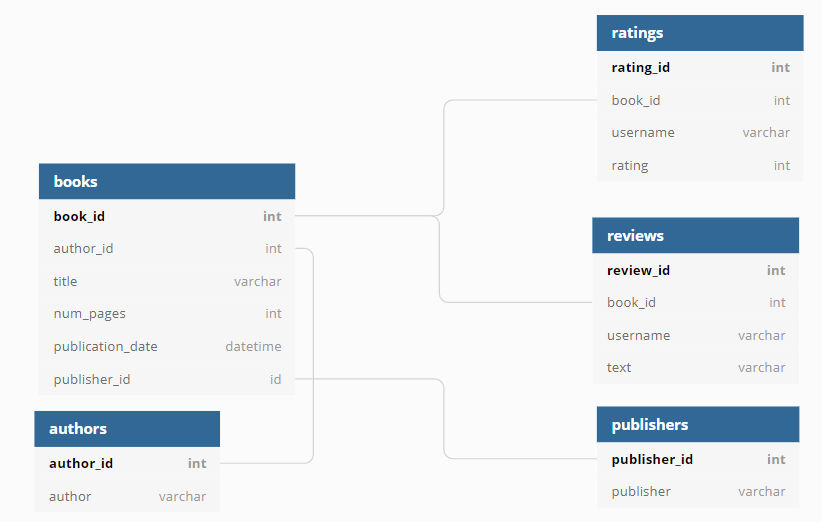

# Задачи исследования

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

## Открытие данных <a id="#start"></a>

### Конфигурация для подключения к базе данных `data-analyst-final-project-db`

Импортируем все необходимые нам библиотеки и настройки `Pandas` для отображения данных при выводе:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
#!pip install -U kaleido

pd.pandas.set_option('display.max_columns', None) #отобразим все колонки таблицы
pd.pandas.set_option('display.max_colwidth', 100) #увеличим ширину колонки до 100 символов

In [ ]:
# устанавливаем параметры
db_config = {
'user': 'praktikum_student', # имя пользователя
'pwd': '****', # пароль
'host': '****',
'port': ****, # порт подключения
'db': 'data-analyst-final-project-db' # название базы данных
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)


Создание подключения

In [ ]:
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

Создадим функцию для вывода SQL-запроса, чтобы немного сэкономить время.

In [ ]:
def sql(query):
    return pd.io.sql.read_sql(query, con = engine)

### Проверка данных

Выведем на экран 5 первых строк каждой из таблиц и количество строк в них.

### `books`

In [ ]:
query = '''
SELECT *
FROM books
LIMIT 5;
'''

sql(query)

book_id  author_id                                                  title  \
0        1        546                                           'Salem's Lot   
1        2        465                     1 000 Places to See Before You Die   
2        3        407    13 Little Blue Envelopes (Little Blue Envelope  #1)   
3        4         82  1491: New Revelations of the Americas Before Columbus   
4        5        125                                                   1776   

   num_pages publication_date  publisher_id  
0        594       2005-11-01            93  
1        992       2003-05-22           336  
2        322       2010-12-21           135  
3        541       2006-10-10           309  
4        386       2006-07-04           268

In [ ]:
query = '''
SELECT COUNT(*)
FROM books
LIMIT 5;
'''

sql(query)

count
0   1000

### `authors`

In [ ]:
query = '''
SELECT *
FROM authors
LIMIT 5;
'''

sql(query)

author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd

In [ ]:
query = '''
SELECT COUNT(*)
FROM authors;
'''

sql(query)

count
0    636

### `publishers`

In [ ]:
query = '''
SELECT *
FROM publishers
LIMIT 5;
'''

sql(query)

publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company

In [ ]:
query = '''
SELECT COUNT(*)
FROM publishers;
'''

sql(query)

count
0    340

### `ratings`

In [ ]:
query = '''
SELECT *
FROM ratings
LIMIT 5;
'''

sql(query)

rating_id  book_id       username  rating
0          1        1     ryanfranco       4
1          2        1  grantpatricia       2
2          3        1   brandtandrea       5
3          4        2       lorichen       3
4          5        2    mariokeller       2

In [ ]:
query = '''
SELECT COUNT(*)
FROM ratings;
'''

sql(query)

count
0   6456

### `reviews`

In [ ]:
query = '''
SELECT *
FROM reviews
LIMIT 5;
'''

sql(query)

review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                                                                  text  
0           Mention society tell send professor analysis. Over provide race technology continue these.  
1                    Foot glass pretty audience hit themselves. Among admit investment argue security.  
2  Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision ...  
3  Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile te...  
4  Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music s...

In [ ]:
query = '''
SELECT COUNT(*)
FROM reviews;
'''

sql(query)

count
0   2793

Получилось вывести каждую из таблиц с данными, которые соответсвуют описанию. Теперь можно приступить к задания.

## Задания

### Количество книг вышедших после 2000 года

Посчитаем сколько книг вышло после 1 января 2000 года.

In [ ]:
query = '''
SELECT COUNT(*)
FROM books
WHERE publication_date >= '2000-01-01';
'''

sql(query)

count
0    821

Количество книг вышедших после 2000 года составляет 821.

### Количество обозоров и средняя оценка

Для каждой книги посчитаем количество обзоров и среднюю оценку.

In [ ]:
query = '''
SELECT title,
       COUNT(DISTINCT(review_id)) reviews_count,
       ROUND(AVG(rating), 2) avg_rating
FROM books b
LEFT JOIN reviews rev ON b.book_id = rev.book_id
LEFT JOIN ratings rat ON b.book_id = rat.book_id
GROUP BY b.book_id
ORDER BY reviews_count DESC, avg_rating DESC
'''

sql(query)

title  \
0                                        Twilight (Twilight  #1)   
1    Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)   
2     Harry Potter and the Chamber of Secrets (Harry Potter  #2)   
3                                                 The Book Thief   
4                                               The Glass Castle   
..                                                           ...   
995         Disney's Beauty and the Beast (A Little Golden Book)   
996                                         Leonardo's Notebooks   
997                                    Essential Tales and Poems   
998              Anne Rice's The Vampire Lestat: A Graphic Novel   
999                                      The Natural Way to Draw   

     reviews_count  avg_rating  
0                7        3.66  
1                6        4.41  
2                6        4.29  
3                6        4.26  
4                6        4.21  
..             ...         ...  
995              0        4.00  
996              0        4.00  
997              0        4.00  
998              0        3.67  
999              0        3.00  

[1000 rows x 3 columns]

Количество книг (**1000**) в данном запросе соответсвует количеству книг таблице `books` - значит при объединении мы ничего не потеряли.

### Фильтр издательств

Определить издательство, которое выпустило наибольшее число книг толще 50 страниц, чтобы исключить таким способом из анализа брошюры.

In [ ]:
query = '''
SELECT p.publisher publisher_name,
       COUNT(b.book_id) published_books_count
FROM publishers p
INNER JOIN books b ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY publisher_name
ORDER BY published_books_count DESC
LIMIT 1;
'''

sql(query)

publisher_name  published_books_count
0  Penguin Books                     42

Издательством, выпустившим наибольшее количество книг толще 50 страниц, является: **Penguin Books**.

Количество выпущенных книг: **42**.

### Автор с самой высокой средней оценкой

Определить автора с самой высокой средней оценкой книг. Учитывайть только книги с 50 и более оценками.

In [ ]:
query = '''
WITH top_books AS(
    SELECT b.book_id,
           b.title,
           b.author_id,
           COUNT(r.rating) rating_count,
           AVG(r.rating) avg_rating_books
    FROM books b
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.title, b.author_id
    HAVING COUNT(r.rating) >= 50
),
top_authors AS(
    SELECT a.author_id,
    AVG(tb.avg_rating_books) avg_rating
    FROM top_books tb
    JOIN authors a ON tb.author_id = a.author_id
    GROUP BY a.author_id
)
SELECT a.author,
       avg_rating average_rating
FROM top_authors ta
JOIN authors a ON ta.author_id = a.author_id
ORDER BY ta.avg_rating DESC
LIMIT 1;
'''

sql(query)

author  average_rating
0  J.K. Rowling/Mary GrandPré        4.283844

Автор с самой высокой средней оценкой книг: **J.K. Rowling/Mary GrandPré**.

Средняя оценка: **4.28**.

### Среднее количество обзоров от пользователей

Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [ ]:
query = '''
SELECT AVG(r.rev_count) AS avg_review_counts
FROM (SELECT username,
COUNT(review_id) AS rev_count
FROM reviews
WHERE username IN (SELECT username
                   FROM ratings
                   GROUP BY username
                   HAVING COUNT(rating) > 48)
                   GROUP BY username) AS r;
'''

sql(query)

avg_review_counts
0               24.0

Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок: **24**.

## Вывод

1. Количество книг вышедших после 2000 года составляет 821.
2. 1000 книг имеют обзоры, количество обзоров достигает 7.
3. Издательством, выпустившим наибольшее количество книг толще 50 страниц, является: Penguin Books.
Количество выпущенных книг: 42.
4. Автор с самой высокой средней оценкой книг: J.K. Rowling/Mary GrandPré. Средняя оценка: 4.28.
5. Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок: 24.